# Función de Hill para activación y represión

Para modelar la activación de un gen por un factor de transcripción, podemos usar la ecuación de Hill, que derivaremos en este tutorial.

# Activación

Consideremos dos moléculas, nuestro activador (factor de transcripción) y el sitio de ADN al que se une. Cada molécula puede estar libremente, o en complejo con la otra; la unión y disociación ocurren a tasas que llamaremos $K_f$ y $K_r$, respectivamente. Para facilitar nuestra nomenclatura, llamaremos $A$ al activador y $B$ a la molécula de ADN, de tal forma que tenemos: 
\begin{align}
F_{trans} + \text{ADN} {\xrightarrow[]{K_f}\atop\xleftarrow[K_r]{}} \text{ADN-}F_{trans} \implies A + B {\xrightarrow[]{K_f}\atop\xleftarrow[K_r]{}} AB
\end{align}

Podemos traducir esta reacción en ecuaciones diferenciales para describir como cambian las concentraciones de $A$ y $B$ a través del tiempo:

\begin{align}
\frac{d[AB]}{dt} = K_f [A] [B] - K_r [AB]  \newline    \frac{d[A]}{dt} = -K_f [A] [B] + K_r [AB]  \newline    \frac{d[B]}{dt} = -K_f [A] [B] + K_r [AB] 
\end{align}

La unión y disociación de $A$ y $B$ ocurren mucho más rápido (seg) que la transcripción y la traducción (min-hr) de un gen. Por lo tanto, podemos asumir que en un sistema bien mezclado, la concentración del complejo $AB$ estará en equilibrio, i.e. el cambio neto es cero:

\begin{align}
\frac{d[AB]}{dt} = 0
\end{align}

Esto nos permite organizar nuestra información sobre el sistema y definir una constante de equilibrio, $K{eq}$:
\begin{align}
K_f [A] [B] = K_r [AB]    \newline    \implies K_{eq} \equiv \frac{K_f}{K_r} = \frac{[AB]}{[A] [B]} 
\end{align}

Ahora buscamos una ecuación para describir la activación de un gen por un activador, que ocurre cuando el activador está unido al promotor del gen. Entonces, necesitamos saber qué fracción de tiempo el ADN del promotor está en complejo con el activador. 

Podemos derivar una ecuación para describir la fracción de promotor, $B$, que está ocupada por el activador $A$, sólo en función de $A$:
\begin{align}
ADN_{ocupado} \equiv \frac{[AB]}{[B_{total}]}    = \frac{[AB]}{[B] + [AB]}    \newline  
\stackrel{[B] = \frac{[AB]}{[A] K_{eq}}}{=} \frac{[AB]}{\frac{[AB]}{[A] K_{eq}} + [AB]}    = \frac{1}{\frac{1}{[A] K_{eq}} + 1}    \newline
= \frac{1}{\frac{1 + [A] K_{eq}}{[A] K_{eq}}}    = \frac{[A] K_{eq}}{1 + [A] K_{eq}}    \newline    = \frac{[A]}{\frac{1}{K_{eq}} + [A]} \stackrel{K_D \equiv \frac{1}{K_{eq}}}{=} \frac{[A]}{K_D + [A]}
\end{align}



# Represión

Deriven la ecuación para describir, en lugar de activación, la represión de un gen con promotor $B$ en función de un represor $R$. Pista: cual es la fracción de ADN desocupado?

In [ ]:
La misma lógica puede usarse para derivar una ecuación para describir la represión de un gen por un factor de transcripción, en cuyo caso queremos saber la fracción de promotor que está desocupado, pues es la que permitirá la transcripción.

\begin{align}
ADN_{desocupado} \equiv \frac{[B]}{[B_{total}]}    = \frac{[B]}{[B] + [RB]}    \newline
\stackrel{[B] = \frac{[RB]}{[R] K_{eq}}}{=} \frac{\frac{[RB]}{[R] K_{eq}}}{\frac{\frac{[RB]}{[R] K_{eq}}}{[R] K_{eq}} + [RB]}    = \frac{1}{\frac{1}{[R] K_{eq}} + 1}    \newline
= \frac{1}{\frac{1 + [R] K_{eq}}{[R] K_{eq}}}    = \frac{1}{1 + [R] K_{eq}}    \newline   \stackrel{K_D \equiv \frac{1}{K_{eq}}}{=} \frac{1}{1 + \frac{[R]}{K_D}}
\end{align}

# Cooperatividad

También es posible tomar en cuenta factores de transcripción que se unen al ADN cooperativamente, en complejo con otras proteínas (e.g. forman dímeros). Cooperatividad es una propiedad de algunas moléculas de actuar en conjunto; en el caso de un dímero, la unión de la primera proteína incrementa la probabilidad de que se una su compañera.

Esta propiedad puede representarse con en el llamado coeficiente de Hill, $n$, que se incorpora en la reacción como sigue:

\begin{align}
n F_{trans} + \text{DNA} {\xrightarrow[]{K_f}\atop\xleftarrow[K_r]{}} \text{DNA-}nF_{trans} \implies nA + B {\xrightarrow[]{K_f}\atop\xleftarrow[K_r]{}} nAB
\end{align}

De forma similar al proceso descrito arriba, es posible derivar una ecuación generalizada par cualquier $n$.
Para activación:

\begin{align}
ADN_{ocupado} = \frac{[A]^n}{K^n + [A]^n}
\end{align}

Conforme incrementa la cooperatividad, el complejo se forma más rápidamente al incrementar la concentración de la proteína; es decir, se vuelve más sensible, lo cual podemos observar gráficamente:

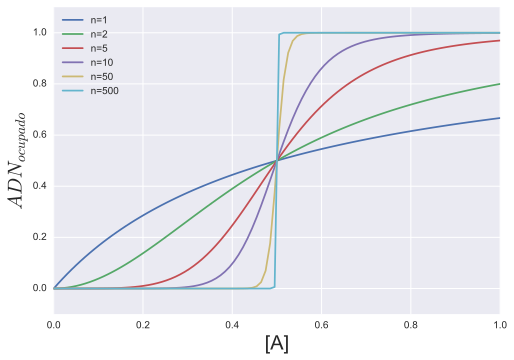

In [1]:
%matplotlib inline
# Para hacer graficos SVG inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def hill_function_act(A, K, n):
    return A**n / (K**n + A**n)

A = np.linspace(0,1,100)
K = 0.5
n_coeff = [1, 2, 5, 10, 50, 500]

for n in n_coeff:
    plt.plot(A, hill_function_act(A, K, n), label='n={}'.format(n))
plt.xlabel('[A]', fontsize=20)
plt.ylabel(r'$ADN_{ocupado}$', fontsize=20)
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

De forma similar para represión:
\begin{align}
ADN_{desocupado} = \frac{1}{1 + (\frac{R}{K_D})^n}
\end{align}

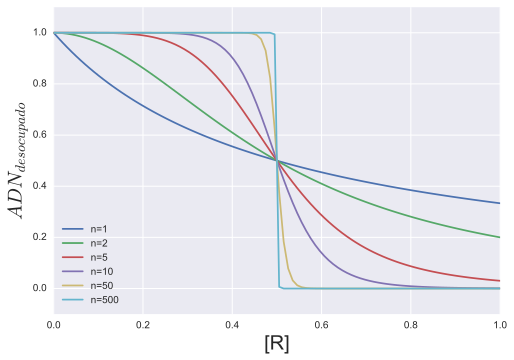

In [2]:
def hill_function_rep(R, K, n):
    return 1 / (1 + (R/K)**n)#(K**n + R**n)

R = np.linspace(0,1,100)
K = 0.5
n_coeff = range(1, 50, 1)

n_coeff = [1, 2, 5, 10, 50, 500]

for n in n_coeff:
    plt.plot(A, hill_function_rep(R, K, n), label='n={}'.format(n))
plt.xlabel('[R]', fontsize=20)
plt.ylabel(r'$ADN_{desocupado}$', fontsize=20)
plt.ylim(-0.1, 1.1)
plt.legend(loc=3)

Ahora podemos escribir una ecuación que describa el cambio en la concentración de una proteína en respuesta a represión o activación, simplemente multiplicando su máxima producción por la fracción de ADN ocupada o desocupada. Por ejemplo, represión de una proteína $p$ por $R$:

\begin{align}
\frac{dp}{dt} = \beta_p\frac{1}{1 + (\frac{R}{K_D})^n} - \gamma_p p
\end{align}

Donde $\beta_p$ es la máxima producción de $p$ y $\gamma_p$ su tasa de degradación.